In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Load and Prepare the MNIST Dataset

In [2]:
# Load the MNIST dataset and split it into training and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


#Multivariate Gaussian Classifier

##Estimate the emprical mean and covariance matrices from the training dataset

In [3]:
# Flatten the training data
x_train_flat = x_train.reshape([(np.shape(x_train)[0]), (np.shape(x_train)[1] * np.shape(x_train)[2])])

# Create empty arrays for the mean and covariance matrices
mu_y = np.zeros([(len(np.unique(y_train))), (np.shape(x_train)[1] * np.shape(x_train)[2])])
cov_y = np.zeros([(len(np.unique(y_train))), (np.shape(x_train)[1] * np.shape(x_train)[2]), (np.shape(x_train)[1] * np.shape(x_train)[2])])

# Loop over all the possible classes
for i in range(len(np.unique(y_train))):
  # Calculate the mean for each class from the training data
  mu_y[i, :] = np.mean(x_train_flat[y_train == i, :].T, axis=1).reshape(1, -1)
  # Calculate the covariance for each class from the training data
  cov_y[i, :, :] = np.cov(x_train_flat[y_train == i, :].T)

###Display the calcualted mean for each training class

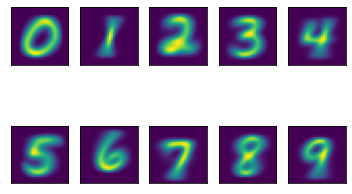

In [6]:
for i in range(len(np.unique(y_train))):
  plt.subplot(2, 5, i + 1)
  plt.imshow(mu_y[i, :].reshape([np.shape(x_train)[1], np.shape(x_train)[2]]))
  plt.xticks(())
  plt.yticks(())
plt.show()

## Log Likelihood Function

In [8]:
def log_likelihood(_x, _mu, _log_det_cov, _inv_cov):
  # check to see if the input is the same shape as the mean
  assert np.shape(_x) == np.shape(_mu)
  ll = -_log_det_cov - np.dot(np.dot((_x - _mu).T, _inv_cov), (_x - _mu))
  return ll[0, 0]

##Find the best regularization parameter and classify the test data

In [10]:
# Flatten the test data
x_test_flat = x_test.reshape([np.shape(x_test)[0], (np.shape(x_test)[1] * np.shape(x_test)[2])])

# Define the range for the regularization parameter
reg = np.linspace(10**-3, 10**5, 100)

# Track the misclassification error for each regularization value
miss_class_err = np.zeros(len(reg))

# Loop over all the possible regularization values
for i in range(len(reg)):
  # Regularize the covariance matrix 
  reg_cov_y = cov_y + reg[i] * np.identity(np.shape(x_test)[1] * np.shape(x_test)[2])
  # Inverse of the regularized covariance matrix
  inv_reg_cov_y = np.linalg.inv(reg_cov_y)
  # Log determinate of the regularized covariance matrix
  log_det_reg_cov_y = np.linalg.slogdet(reg_cov_y)[1]
  ll = np.zeros(len(np.unique(y_train)))
  y_hat = []
  miss_class = 0
  # Loop over all the test samples
  for j in range(len(y_test)):
    # Loop over all the classes
    for k in range(len(np.unique(y_train))):
      # Calculate the log likelihood of each class for each test sample
      ll[k] = log_likelihood(x_test_flat[j].reshape(-1, 1), mu_y[k].reshape(-1, 1), log_det_reg_cov_y[k], inv_reg_cov_y[k])
    # Find the class with the maximum log likelihood 
    y_hat.append(np.argmax(ll))
    # Calculate the error
    if y_hat[j] != y_test[j]:
      miss_class += 1
  # Store the misclassification error for each regularization value
  miss_class_err[i] = miss_class / len(y_test)

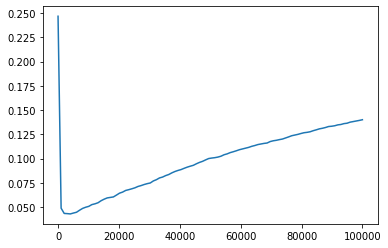

The minimum misclassification error is 0.043 at lambda equals 4040.405


In [12]:
# Visualize the misclassification error vs. the regularization value
plt.plot(reg, miss_class_err)
plt.show()

# Find the regularization parameter that has the lowest misclassification error
print('The minimum misclassification error is', np.min(miss_class_err), 'at lambda equals', reg[np.argmin(miss_class_err)])